# BI Exercise solution sheet

<h1 id="tocheading">Table of Contents</h1>
* [Question 1](#q1)
    1. [What are the top three body parts most frequently represented in this dataset?](#q1.1)
    2. [What are the top three body parts that are least frequently represented?](#q1.2)
* [Question 2](#q2)   
    1. [How many injuries in this dataset involve a skateboard?](#q2.1)
    2. [Of those injuries, what percentage were male and what percentage were female?](#q2.2)
    3. [What was the average age of someone injured in an incident involving a skateboard?](#q2.3)
* [Question 3](#q3) 
    1. What diagnosis had the highest hospitalization rate?(#q3)
    2. What diagnosis most often concluded with the individual leaving without being seen?(#q3)
    3. Briefly discuss your findings and any caveats you'd mention when discussing this data(#q3)
* [Question 4](#q4)
    1. Visualize any existing relationship between age and reported injuries
        * [ages for different injuries](#q4.1)
        * [injuries for different age](#q4.2)
* [Question 5](#q5)
    * [Which products causes top occuring injuries?](#q5.1)
    * [Let's see if there are more reported injuries on national holidays?](#q5.2)
    * [ Let's see if there are more reported injuries on weekends?](#q5.3)
    * [Are there a lot of 2014 ice bucket challenge related injuries?](#q5.4)
    * [Other interesting questions](#q5.5)
   

*NOTE: Please use this toggle button to switch between code and report forthback*

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from IPython.display import display, Image, HTML
from glob import iglob
import traceback
import copy

import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import time
import warnings
warnings.filterwarnings('ignore')

/Users/magrawal/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
diag_encoding = pd.read_csv('../BIHomework/DiagnosisCodes.csv', index_col=1)
body_part_encoding = pd.read_csv('../BIHomework/BodyParts.csv', index_col=1)
neiss_data = pd.read_csv('../BIHomework/NEISS2014.csv', parse_dates=['trmt_date'], infer_datetime_format=True)

In [4]:
neiss_data = neiss_data.rename(columns={'CPSC Case #': 'case_id'})

##### Data gist

* Number of rows in data are

In [5]:
neiss_data.shape

(65499, 18)

* Number of cols in data are

In [6]:
len(neiss_data.columns)

18

* Number of unique values for each columns are

In [7]:
for i, j in enumerate(neiss_data.columns):
    print i, j, neiss_data[j].nunique()

0 case_id 65499
1 trmt_date 365
2 psu 86
3 weight 17
4 stratum 5
5 age 127
6 sex 2
7 race 7
8 race_other 40
9 diag 30
10 diag_other 1238
11 body_part 26
12 disposition 6
13 location 9
14 fmv 4
15 prod1 667
16 prod2 477
17 narrative 65422


In [8]:
neiss_data.describe()

,case_id,psu,weight,age,diag,body_part,disposition,location,fmv,prod1,prod2
count,6.549900e+04,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,65499.000000,8446.000000
mean,1.411328e+08,46.551321,46.627602,43.224431,59.983618,64.188873,1.267775,2.403548,0.008122,2107.615735,1845.662207
std,1.993606e+06,27.253670,35.649986,48.191852,6.133152,24.066252,0.918464,3.194460,0.141298,1334.875187,1104.161811
min,1.401047e+08,1.000000,5.717400,0.000000,41.000000,0.000000,1.000000,0.000000,0.000000,106.000000,102.000000
25%,1.404360e+08,23.000000,14.308900,12.500000,57.000000,35.000000,1.000000,0.000000,0.000000,1211.000000,1141.000000
50%,1.407254e+08,42.000000,37.414900,28.000000,59.000000,75.000000,1.000000,1.000000,0.000000,1807.000000,1807.000000
75%,1.410314e+08,66.000000,81.576000,57.000000,64.000000,82.000000,1.000000,4.000000,0.000000,3265.000000,1871.000000
max,1.503320e+08,101.000000,112.167100,223.000000,74.000000,94.000000,8.000000,9.000000,3.000000,5555.000000,5555.000000


# Question 1 <a class="anchor" id="q1"></a>

## 1. What are the top three body parts most frequently represented in this dataset?<a class="anchor" id="q1.1"></a>

* Head
* Face
* Finger

In [9]:
top_3_injury_bodypart_count = neiss_data.body_part.value_counts().head(3)

* Most injured part and count

In [10]:
top_3_injury_bodypart_count

75    9891
76    5786
92    5783
Name: body_part, dtype: int64

In [11]:
body_part_encoding.loc[top_3_injury_bodypart_count.index]

,BodyPart
75,Head
76,Face
92,Finger


## 2.  What are the top three body parts that are least frequently represented?<a class="anchor" id="q1.2"></a>
* Pubic Region
* Internal
* Arm, upper

In [12]:
bot_3_injury_bodypart_count = neiss_data.body_part.value_counts().tail(5)[::-1]

* Least injured parts and corresponding count

In [13]:
bot_3_injury_bodypart_count

84    4  
38    286
87    390
0     549
80    745
Name: body_part, dtype: int64

In [14]:
body_part_encoding.loc[bot_3_injury_bodypart_count.index]

,BodyPart
84,25-50% of body
38,Pubic region
87,Not Recorded
0,Internal
80,"Arm, upper"


# Question 2
1. How many injuries in this dataset involve a skateboard?
2. Of those injuries, what percentage were male and what percentage were female?
3. What was the average age of someone injured in an incident involving a skateboard?

### 1. How many injuries in this dataset involve a skateboard?<a class="anchor" id="q2.1"></a>

495 out of 65499 injuries(~0.8%) involved a skateboard

#### Details

**Hypothesis**  
Skateboard can be a reason for the injury in the following ways

Primary way
* Injury causing product was identified as a manual skateboard(1333) and got recorded

Secondary
* Injury causing product was identified as a powered skatebaord and got recorded as 5042(Scooters/skateboards, powered) and narrative tells about skateboard
* Injury causing product was not identified and got recorded as 5555(no current product code)/9999(pending product code assignment) and narrative tells about skateboard

**After Calculation**  
Number of injuries by secondary reasons in almost zero. So All injuries can be found by primary way


In [15]:
skate_inj = neiss_data.query('prod1==1333 or prod2==1333')
skate_injcount = skate_inj.shape
skate_injcount

(495, 18)

In [16]:
neiss_data.query('prod1==9999 or prod2==9999').shape

(0, 18)

* Unclear product code records does not have mention of skateboards so no unclear product codes for skateboards 

In [17]:
neiss_data.query('prod1==5555 or prod2==5555')['narrative']

4246     DX INGESTION OF LIQUID NICOTINE E-CIGARETTE 12MOM MOP REPORTS PATIENT GETTING INTO FATHERS LIQUID E-CIGS & SPLASH ON FACE & POSS INGESTED   
11787    8MOF INGESTED PEA SIZE AMOUNT OT TOBACCO END OF CIGARETTE                                                                                   
14824    PT FOUND IN AN ACTIVE METH LAB , DHR SENT FOR DRUG SCREENING  CHEMICAL EXPOSURE  14MOF                                                      
24157    2 YO F WAS PLAYING ON FLOOR AT GMA'S HOUSE & STARTED HAVING HALLUCINATI ONS FROM EATING MARIJUANA BAKED GOODS. POSITIVE TOX SCREEN; ADMITTED
51072    8 MOM AT A CIGARETTE AT HOME INGESTED F/B                                                                                                   
56952    2YOM GOT INTO SOME CIGARETTE BUTTS AND ATE THEM, POISONING, VOMITING                                                                        
Name: narrative, dtype: object

In [18]:
neiss_data.query('prod1!=1333 and prod2!=1333 and (prod1==5042 or prod2==5042)').shape

(23, 18)

In [19]:
neiss_data.query('prod1!=1333 and prod2!=1333 and (prod1==5042 or prod2==5042)')['narrative'].str.contains('SKATE').sum()

0

In [20]:
total_injury_count = neiss_data.shape
total_injury_count

(65499, 18)

In [21]:
float(skate_injcount[0])*100/total_injury_count[0]

0.75573672880502

### 2. Of those injuries, what percentage were male and what percentage were female?<a class="anchor" id="q2.2"></a>

Among them, ~82% are Male and ~18% are Female

In [22]:
skate_inj_gender = skate_inj.sex.value_counts()

In [23]:
skate_inj_gender

Male      406
Female    89 
Name: sex, dtype: int64

In [24]:
skate_inj_gender*100/sum(skate_inj_gender)

Male      82.020202
Female    17.979798
Name: sex, dtype: float64

### 3. What was the average age of someone injured in an incident involving a skateboard?<a class="anchor" id="q2.3"></a>

Average/Mean age is ~18 years old(17.89)

In [25]:
skate_inj.age.describe()

count    495.000000
mean     17.890909 
std      9.049807  
min      3.000000  
25%      12.000000 
50%      16.000000 
75%      21.000000 
max      71.000000 
Name: age, dtype: float64

# Question 3<a class="anchor" id="q3"></a>

1. What diagnosis had the highest hospitalization rate? 
2. What diagnosis most often concluded with the individual leaving without being seen?
3. Briefly discuss your findings and any caveats you'd mention when discussing this data

*Solution*
1. Submersion if hospitalization is considered only for the current facility other wise cannot be said
2. Cannot be concluded from data as number of observations are insufficient
3. Number of samples are insufficient and data does not distinguish seperately the required disposition.

In [26]:
diag_encoding = diag_encoding.reset_index()

In [27]:
diag_encoding.columns = ['diag', 'Diagnosis']

In [28]:
neiss_data = pd.merge(neiss_data, diag_encoding, on='diag')

In [29]:
def str_compacter(input_string):
    if len(input_string)<30:
        return input_string
    else:
        return input_string[0:25] + '..' + input_string[-5:]
neiss_data['Diagnosis'] = neiss_data["Diagnosis"].apply(str_compacter)

In [30]:
diag_dispostion = pd.crosstab(neiss_data.Diagnosis, neiss_data.disposition)

In [31]:
diag_dispostion['hsptl_rate'] = diag_dispostion[4]/diag_dispostion.sum(axis=1)

In [32]:
diag_dispostion['hsptl_tsfr_rate'] = (diag_dispostion[2] + diag_dispostion[4])/diag_dispostion.sum(axis=1)

In [33]:
diag_dispostion['notr_rate'] = diag_dispostion[6]/diag_dispostion.sum(axis=1)

In [34]:
diag_dispostion.sort_values('hsptl_rate', ascending=False).head(5)

disposition,1,2,4,5,6,8,hsptl_rate,hsptl_tsfr_rate,notr_rate
Diagnosis,,,,,,,,,
Submersion (including Dro..ning),26,0,23,3,0,2,0.425926,0.422593,0.000000
Fracture,7561,267,1811,88,6,2,0.186030,0.213453,0.000616
Amputation,88,12,20,3,2,0,0.160000,0.255673,0.015947
Poisoning,554,18,88,39,24,1,0.121547,0.146384,0.033137
Internal organ injury,4439,101,630,66,63,7,0.118734,0.137765,0.011873


* Some of the rows have very few observation so number of observation might be insufficient to compare between subermision and fracture so needs an **error analysis**

In [35]:
diag_dispostion.sort_values('notr_rate', ascending=False).head(5)

disposition,1,2,4,5,6,8,hsptl_rate,hsptl_tsfr_rate,notr_rate
Diagnosis,,,,,,,,,
Poisoning,554,18,88,39,24,1,0.121547,0.146384,0.033137
Other/Not Stated,7091,63,613,83,257,13,0.075493,0.083250,0.031650
Aspirated foreign object,57,2,5,0,2,0,0.075758,0.105939,0.030220
"Burns, radiation (include..etc.)",34,0,0,0,1,0,0.000000,0.000000,0.028571
"Burns, chemical (caustics..etc.)",82,1,0,1,2,0,0.000000,0.011628,0.023253


* Number of observation may be insufficient to compare between subermision and fracture so needs an **error analysis**

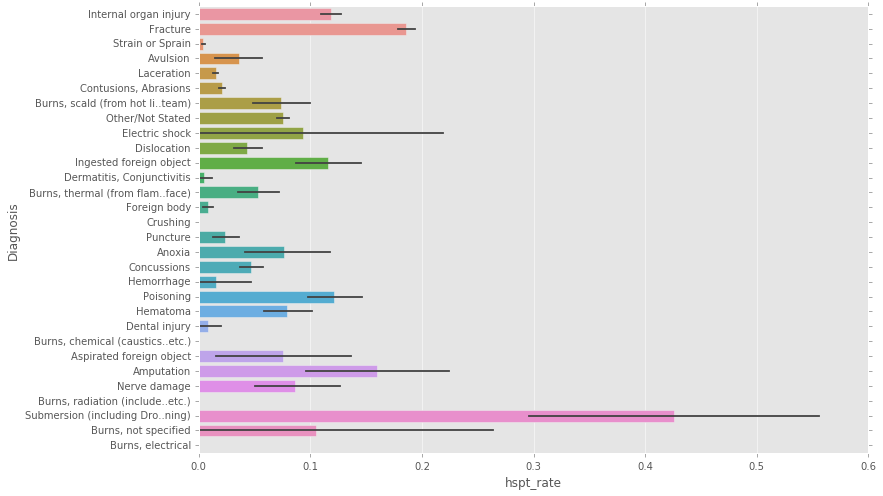

In [36]:
fig, ax = pyplot.subplots(figsize=(12,8))
sns.barplot(y='Diagnosis',
            x='hspt_rate',
            data= neiss_data[['Diagnosis', 'disposition']] \
                    .assign(hspt_rate=lambda df: df.disposition.apply(lambda y: 1 if y==4 else 0)),
            orient='h',
            ax=ax,)

* Submersion has the highest hospitalisation rate when limited to same facility(when taking confidence interval as 95%)

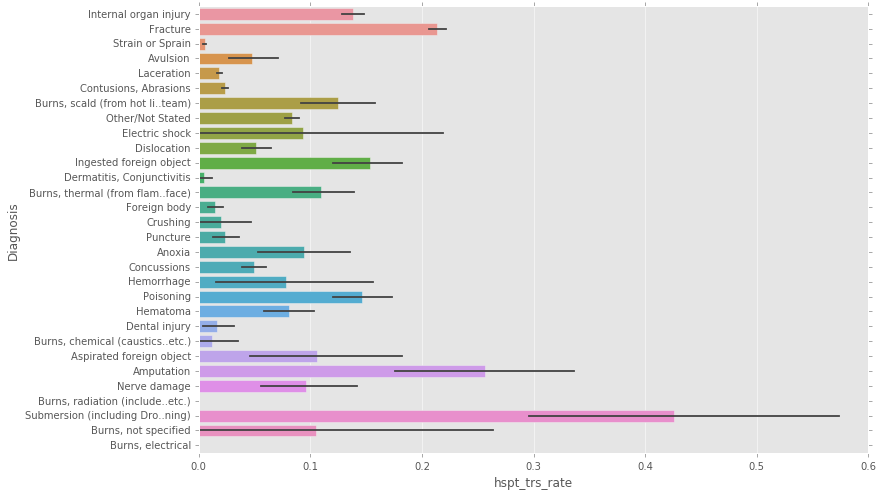

In [37]:
fig, ax = pyplot.subplots(figsize=(12,8))
sns.barplot(y='Diagnosis',
            x='hspt_trs_rate',
            data= neiss_data[['Diagnosis', 'disposition']] \
                    .assign(hspt_trs_rate=lambda df: df.disposition.apply(lambda y: 1 if (y==4 or y==2)  else 0)),
            orient='h',
            ax=ax,)

* Highest hospitalisation not clear if another a transfer can lead to hospitalisation

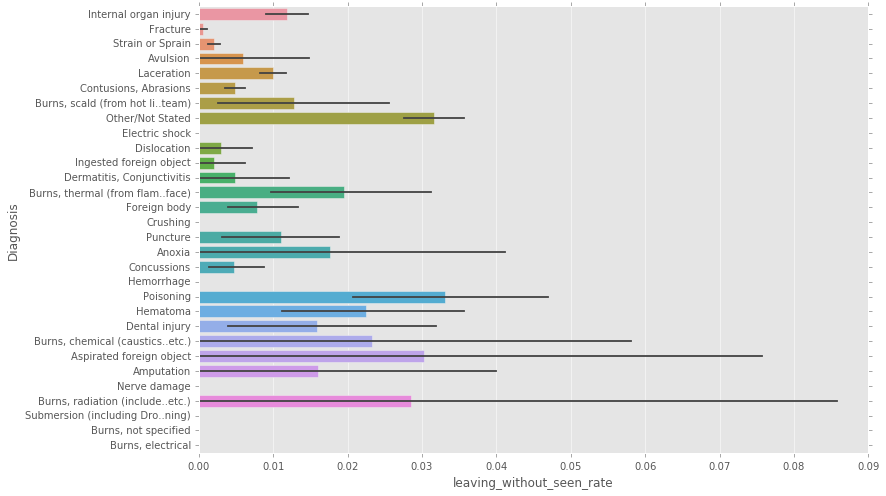

In [38]:
fig, ax = pyplot.subplots(figsize=(12,8))
sns.barplot(y='Diagnosis',
            x='leaving_without_seen_rate',
            data= neiss_data[['Diagnosis', 'disposition']] \
                    .assign(leaving_without_seen_rate=lambda df: df.disposition.apply(lambda y: 1 if y==6 else 0)),
            orient='h',
            ax=ax)

* Not conclusive for people leaving without seen due to following 2 reasons
    * It cannot be said for people leaving without seen as number of obersations is less to conclude anything
    * Data does distiniguish between Left without being seen and Left against medical advice

# Question 4<a class="anchor" id="q4"></a>
1. Visualize any existing relationship between age and reported injuries

* There are broadly 2 relations to explore
    * Which ages does different injuries occur to?
    * Which injuries are common for different ages?

In [39]:
neiss_data.age = neiss_data.age.apply(lambda x: x if x<200 else float(x%100)/12)

### ages for different injuries<a class="anchor" id="q4.1"></a>

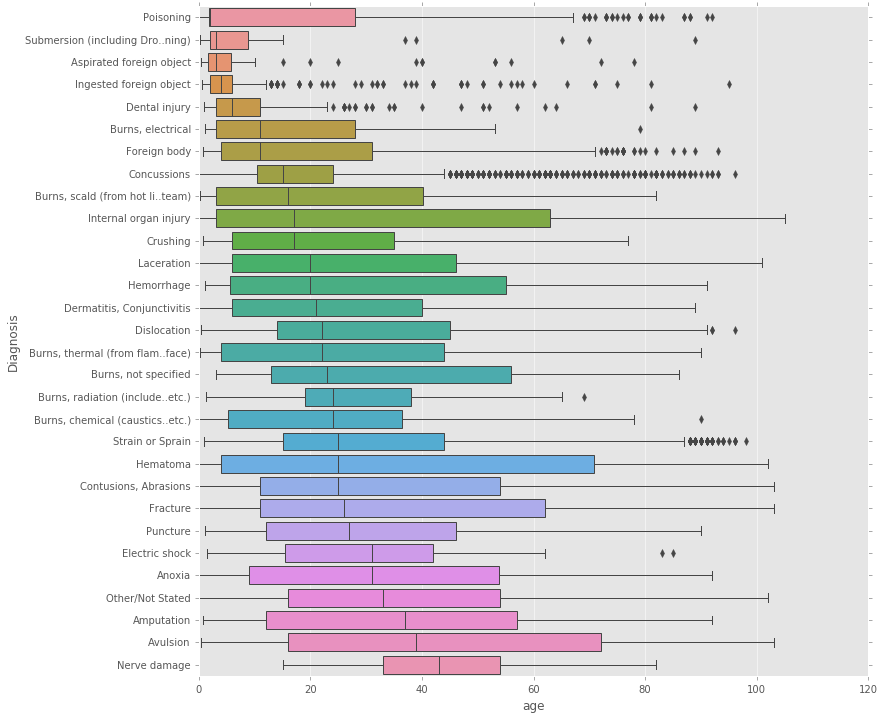

In [40]:
a4_dims = (12, 12)

fig, ax = pyplot.subplots(figsize=a4_dims)

# neiss_data["Diagnosis"] = neiss_data
sns.boxplot(ax=ax, y=neiss_data['Diagnosis'], x=neiss_data['age'] , orient='h',
           order=neiss_data[['Diagnosis', 'age']].groupby('Diagnosis').median().sort_values('age').index)

* Few points from distribution of age group from diagnosis
    * Poisoning, drowing, ingesting foreign objects is limited to mostly kids
    * Nerve damage occurs significantly more in old people than young people
    * Strain/sprain, burns, fracture has median people in the age of 20-30
    * Amputation and avulsion are more likely to be occuring in 30-50 than younger/older people


In [41]:
age_injury = neiss_data[['age', 'diag', 'weight']] \
               .groupby(['age', 'diag']) \
               .count() \
               .reset_index('diag') \
               .pivot(columns='diag', values='weight') \
               .fillna(0) 

In [42]:
age_injury = age_injury.assign(tot_injury=age_injury.sum(axis=1))

#### Quantising age into age groups using their injury patterns

(array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
         78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108]),
 <a list of 37 Text xticklabel objects>)

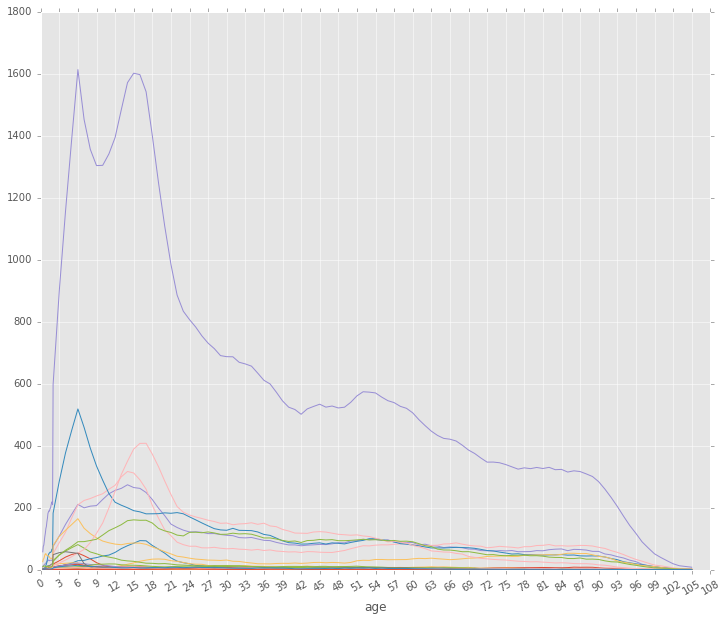

In [43]:
fig, ax = pyplot.subplots(figsize=(12,10))
age_injury.rolling(5) \
        .mean() \
        .plot(ax=ax, legend=None, xticks=range(0, 110, 3))             
plt.xticks(rotation='30')

The bigger graph is the total number of injury while remaining indictates one type of injury.
Looking at graph, age is into following age cut-offs having similar pattern 

In [44]:
age_classes = [0, 2, 5, 10, 20, 40, 60, 110]

In [45]:
age_injury.index = pd.cut(age_injury.index, bins=age_classes)
age_injury_count = age_injury.reset_index().groupby('index').sum()

In [46]:
injury_age_count = age_injury_count.drop(['tot_injury'], axis=1).transpose()
all_top_cat = []
for col_df in injury_age_count.columns:
    top_cat = list(injury_age_count[col_df].nlargest(5).index)
    all_top_cat = all_top_cat + top_cat
all_top_cat = list(set(all_top_cat))
all_top_cat

[64, 68, 71, 53, 57, 59, 62]

In [47]:
bot_cat = [i for i in list(injury_age_count.index) if i not in all_top_cat]
impinjury_count = injury_age_count.loc[all_top_cat]
impinjury_count.loc[100] = injury_age_count.loc[bot_cat].sum()

### injuries for age<a class="anchor" id="q4.2"></a>

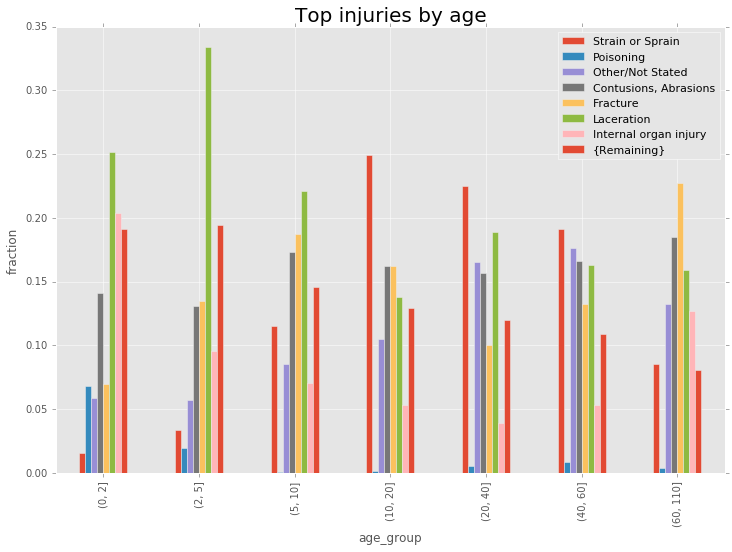

In [48]:
fig, ax = pyplot.subplots(figsize=(12,8))
imp_injury_num= impinjury_count \
               .assign(Diagnosis=diag_encoding \
                                     .set_index('diag') \
                                     .loc[list(impinjury_count.index)]) \
               .set_index('Diagnosis') \
               .transpose() 
imp_injury_ratio = imp_injury_num.divide(imp_injury_num.sum(axis=1), axis=0)   
imp_injury_ratio.columns = imp_injury_ratio.columns.fillna('{Remaining}')
imp_injury_ratio.plot(kind='bar', ax=ax)
plt.xlabel('age_group')
plt.ylabel('fraction')
plt.legend(loc=1, prop={'size': 11})
plt.title('Top injuries by age', size=20)

* Major type of injuries for different age-groups is
    * All the age-groups has Laceration as one of the most occuring injury with more pronounced for age group babies 2-5
    * for infants(0-2): Laceration and internal organ injury combined is 45%
    * for babies(2-5): Laceration is reponsible for around 35% of the injuries, and then fracture, 'constusions, abrasions' also take a big share
    * for young kids(5-10): laceration, fracture, contusion in total comprises 60% of the injuries
    * for age-group 10-20: Strain/Sprain is the major cause with fracture, laceration, contusion/abrasions
    * for adults 20-40: strain/sparin with laceration and contusions/abrasion comprise 60% of all
    * for middle-age people 40-60: distributed among strain/sprain, contusion & abrasions
    * for old 60-100: fracture is leading cause with contusions/abrasion and lacerations

# Question 5+ Investigate the data however you like and discuss any interesting insights you can find in the data (Don’t feel pressured to spend hours on this)<a class="anchor" id="q5"></a>

### Which products causes top occuring injuries?<a class="anchor" id="q5.1"></a>

In [49]:
injury_product = pd.crosstab(neiss_data[neiss_data.diag.isin(top_cat)].Diagnosis, neiss_data[neiss_data.diag.isin(top_cat)].prod1).transpose()

In [50]:
injury_product.loc[injury_product.max(axis=1).nlargest(5).sort_values(ascending=False).index]

Diagnosis,"Contusions, Abrasions",Fracture,Internal organ injury,Laceration,Other/Not Stated
prod1,,,,,
464,7,0,0,1331,18
1807,1222,979,946,581,623
1842,1055,923,496,461,770
4057,249,128,147,582,71
5040,556,484,201,425,225


In [51]:
injury_product['Laceration'].nlargest(5)

prod1
464     1331
4057    582 
1807    581 
4076    533 
1842    461 
Name: Laceration, dtype: int64

* Knives(464) a leading cause of lacerations, followed by flooring material(1807), tables(4057), bedframes(4076), leaf blowers(461)

In [52]:
injury_product['Internal organ injury'].nlargest(5)

prod1
1807    946
1842    496
4076    482
4074    210
5040    201
Name: Internal organ injury, dtype: int64

In [53]:
injury_product['Fracture'].nlargest(5)

prod1
1807    979
1842    923
5040    484
1205    442
1211    438
Name: Fracture, dtype: int64

In [54]:
injury_product['Contusions, Abrasions'].nlargest(5)

prod1
1807    1222
1842    1055
5040    556 
4076    541 
1893    388 
Name: Contusions, Abrasions, dtype: int64

* Flooring material, stairs are leading cause of internal orgain injury, fracture, contusions/abrasions
* Other leading reason for fracture is Basketball(1205) and football(1211)

### Let's see if there are more reported injuries on national holidays<a class="anchor" id="q5.2"></a>
* Not so

In [55]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
dr = pd.date_range(start='2014-01-01', end='2014-12-31')
holidays = cal.holidays(start=dr.min(), end=dr.max())

In [56]:
neiss_data['public_holiday'] = neiss_data.trmt_date.isin(holidays)

In [57]:
holidays

DatetimeIndex(['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25'],
              dtype='datetime64[ns]', freq=None)

In [58]:
neiss_data['weekday'] = neiss_data.trmt_date.apply(lambda x: x.isoweekday())

In [59]:
neiss_data['age_group'] = pd.cut(neiss_data.age, age_classes)

In [60]:
pd.crosstab(neiss_data['public_holiday'], neiss_data['age_group']).divide(pd.Series({False: 355, True: 10}), axis=0)

age_group,"(0, 2]","(2, 5]","(5, 10]","(10, 20]","(20, 40]","(40, 60]","(60, 110]"
public_holiday,,,,,,,
False,15.819718,12.628169,17.909859,37.267606,35.938028,29.135211,30.757746
True,13.600000,13.400000,16.200000,31.700000,37.600000,33.100000,33.500000


In [61]:
pd.crosstab(neiss_data['weekday'], neiss_data['age_group'])

age_group,"(0, 2]","(2, 5]","(5, 10]","(10, 20]","(20, 40]","(40, 60]","(60, 110]"
weekday,,,,,,,
1,856,652,892,1978,2019,1571,1687
2,763,668,912,1979,1808,1453,1505
3,805,591,896,1857,1818,1458,1596
4,815,643,879,1953,1713,1416,1600
5,797,634,844,1812,1655,1478,1667
6,854,728,1034,2059,1950,1656,1675
7,862,701,1063,1909,2171,1642,1524


### Let's see if there are more reported injuries on weekends<a class="anchor" id="q5.3"></a>
* Not so

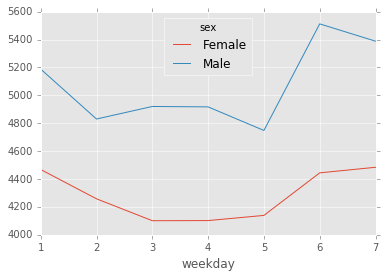

In [62]:
pd.crosstab(neiss_data['weekday'], neiss_data['sex']).plot()

* There are more reported injuries on weekends than weekdays for both gender but monday(by code 0) has more injuries than other weekdays. Let's find out why is so?

In [63]:
all_top_cat

[64, 68, 71, 53, 57, 59, 62]

In [64]:
list(diag_encoding.set_index('diag').loc[all_top_cat].Diagnosis)

['Strain or Sprain',
 'Poisoning',
 'Other/Not Stated',
 'Contusions, Abrasions',
 'Fracture',
 'Laceration',
 'Internal organ injury']

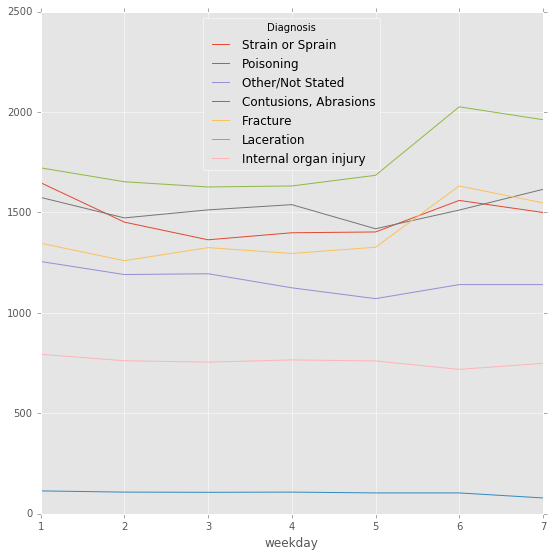

In [65]:
fig, ax = pyplot.subplots(figsize=(9,9))
pd.crosstab(neiss_data['weekday'], neiss_data['Diagnosis'])[list(diag_encoding.set_index('diag').loc[all_top_cat].Diagnosis)].plot(ax=ax)

* There are more Laceration, fractures on saturday and sunday
* There are more strain or sprain on monday

### Are there a lot of 2014 ice bucket challenge related injuries?<a class="anchor" id="q5.4"></a>
* Not Many visibly

In [66]:
neiss_data[neiss_data.narrative.apply(lambda x: 'ICE' in x and 'BUCKET' in x)][['case_id', 'trmt_date', 'prod1', 'narrative']]

,case_id,trmt_date,prod1,narrative
25034,140719379,2014-07-03,1143,"18 YOM HAS LOWER BACK PAIN, AFTER LIFTING A BUCKET OF ICE, LAST NIGHT- PAIN. DX; ACUTE LUMBAR STRAIN"
25207,140939421,2014-09-04,1143,"48YOF LIFTED BUCKETS OF ICE AND HAS LOW BACK PAIN, LUMBAR STRAIN AND BACK PAIN"
48061,140937079,2014-09-10,1143,"19 YOM LIFTING BUCKET OF ICE WAS STRUCK LEFT EYE BY AN ICE CUBE THAT FELL OUT OF BUCKET, DX: CORNEAL ABRASION"


### Other Interesting questions(TBD)<a class="anchor" id="q5.5"></a>
* Not so

* What type of injuries are hard to categorise by reporters?
* Finding where the injury occurs i.e. inside the house, etc and relationship with gender
* Seasonal injury trends i.e. christmas, thanksgiving
* Most dangerous toys
* Variation of injury by race